### Import Needed Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* pandas is a library for working with large datasets.
* numpy is a library that enables us to work with math and arrays (Like MATLAB)
* matplotlib is a library that visualize data.

### Load the data

In [44]:
df = pd.read_csv('FuelConsumption.csv')

df stands for dataframe.
Let's take a look at our data.

In [47]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [49]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Since we want to predict the CO2 Emission of the vehicles, lets clean data, and pick the most relevant data for the model.

In [52]:
cdf = df [['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


cdf is the feautured dataframe, containing the most useful data for our purpose. 

Let's Visualize the relation between each feature.

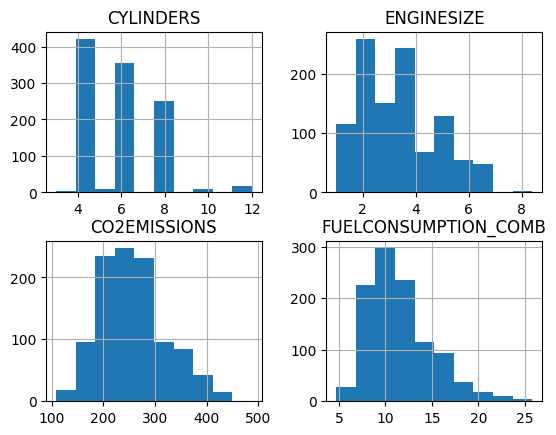

In [56]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


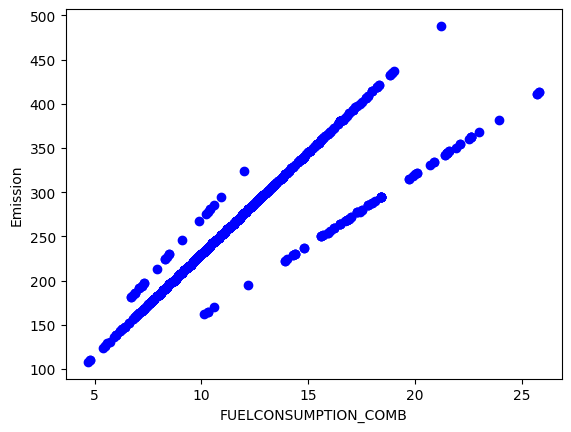

In [59]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

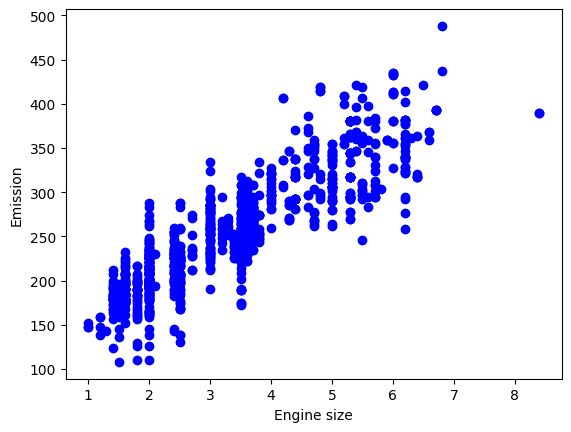

In [61]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

This scatter plot seems to e a relatively suitable relation for the regressor model. Thus we choose this relation and establish the regression model.

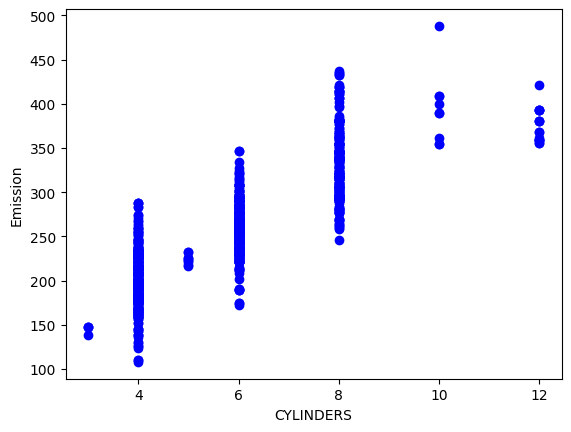

In [64]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

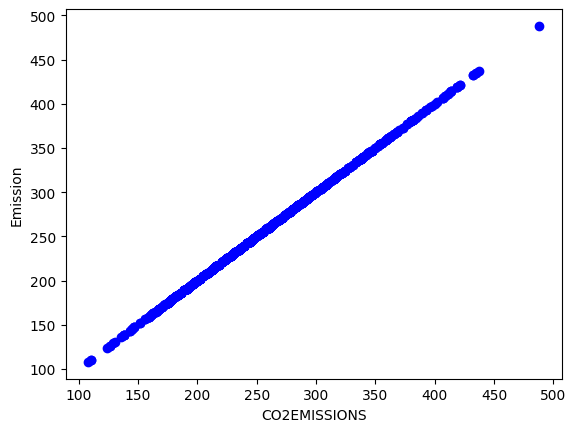

In [66]:
plt.scatter(cdf.CO2EMISSIONS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("Emission")
plt.show()

### Let's create the model.

Initially we need to split the data into train and test models.

In [74]:
from sklearn.model_selection import train_test_split
X = np.asanyarray(cdf[['ENGINESIZE']])
y = np.asanyarray(cdf[['CO2EMISSIONS']])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)

### Modeling

In [96]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[39.24220827]]
Intercept:  [125.1277814]


### Plot the Results

Text(0, 0.5, 'Emission')

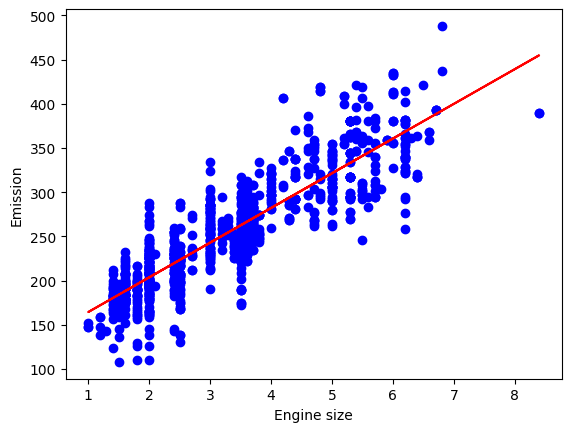

In [99]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.plot(X_train, regressor.coef_[0][0]*X_train + regressor.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

In [102]:
from sklearn.metrics import r2_score

X_test = np.asanyarray(cdf[['ENGINESIZE']])
y_test = np.asanyarray(cdf[['CO2EMISSIONS']])
y_hat = regressor.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

Mean absolute error: 23.36
Residual sum of squares (MSE): 946.39
R2-score: 0.76
